In [24]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
import pandas as pd

In [25]:
def compute_cost(x, y, w, b): 
    #here i will calculate the lost fonction.
    total_cost=0
    m=len(x)
    for i in range(m):
        f=w*x[i]+b
        total_cost=total_cost+(1/(2*m))*(f-y[i])*(f-y[i])
    return total_cost

In [26]:
def compute_gradient(x, y, w, b): 
    #and here i will calculate the gradient
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f=w*x[i]+b
        dj_dw=dj_dw+(1/m)*(f-y[i])*x[i]
        dj_db=dj_db+(1/m)*(f-y[i])
    return dj_dw, dj_db

In [35]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    #here i will applicate the gradient descent
    
    m = len(x)
    
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        
        dj_dw, dj_db = compute_gradient(x,y,w,b)  

        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        
        if i<100000:     
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)

        
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [28]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

In [29]:
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [70]:
X = salary['Experience Years']
y = salary['Salary']

X

0      1.1
1      1.2
2      1.3
3      1.5
4      2.0
5      2.2
6      2.5
7      2.9
8      3.0
9      3.2
10     3.2
11     3.5
12     3.7
13     3.8
14     3.9
15     4.0
16     4.0
17     4.1
18     4.3
19     4.5
20     4.7
21     4.9
22     5.1
23     5.3
24     5.5
25     5.9
26     6.0
27     6.2
28     6.5
29     6.8
30     7.1
31     7.9
32     8.2
33     8.5
34     8.7
35     9.0
36     9.5
37     9.6
38    10.3
39    10.5
Name: Experience Years, dtype: float64

In [71]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(X,y, initial_w, initial_b, 
                     compute_cost(X,y,initial_w,initial_b), compute_gradient(X,y,initial_w,initial_b), alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 1389633005.52   
Iteration  150: Cost 45833968.02   
Iteration  300: Cost 31579201.33   
Iteration  450: Cost 23805260.81   
Iteration  600: Cost 19565685.91   
Iteration  750: Cost 17253602.95   
Iteration  900: Cost 15992691.72   
Iteration 1050: Cost 15305044.63   
Iteration 1200: Cost 14930031.29   
Iteration 1350: Cost 14725515.04   
w,b found by gradient descent: 9700.22351567494 24533.06695202033


In [72]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

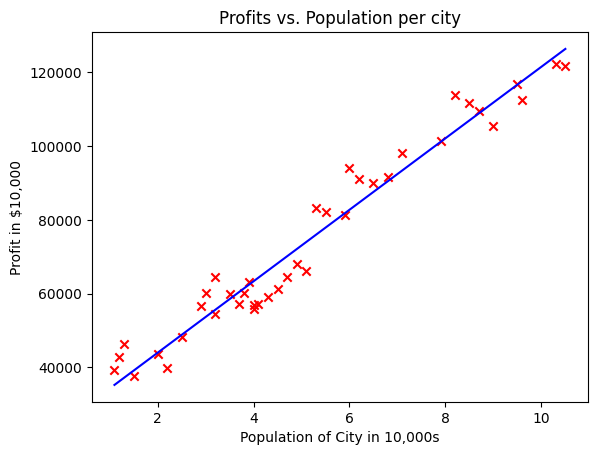

In [73]:
# Plot the linear fit
plt.plot(X, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X, y, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [74]:
w*salary.iloc[0,0]+b

35203.31281926276

In [80]:
from sklearn.metrics import r2_score
r2_score(predicted, y)

0.9550974528377838